In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/EDiReF-SemEval/Dataincsv/task3.csv")

In [ ]:
df

,Unnamed: 0,speakers,emotions,utterances,triggers
0,0,Chandler,neutral,also I was the point person on my company's tr...,0.0
1,1,The Interviewer,neutral,You must've had your hands full.,0.0
2,2,Chandler,neutral,That I did. That I did.,0.0
3,3,The Interviewer,neutral,So let's talk a little bit about your duties.,1.0
4,4,Chandler,surprise,My duties? All right.,0.0
...,...,...,...,...,...
34995,34995,Joey,disgust,It made me nuts.,0.0
34996,34996,Chandler,neutral,You or me?,0.0
34997,34997,Ross,neutral,"I got it. Uh, Joey, women don't have Adam's ap...",0.0
34998,34998,Joey,surprise,"You guys are messing with me, right?",1.0


In [ ]:
df=df.drop(['Unnamed: 0','speakers'],axis=1)

In [ ]:
df

,emotions,utterances,triggers
0,neutral,also I was the point person on my company's tr...,0.0
1,neutral,You must've had your hands full.,0.0
2,neutral,That I did. That I did.,0.0
3,neutral,So let's talk a little bit about your duties.,1.0
4,surprise,My duties? All right.,0.0
...,...,...,...
34995,disgust,It made me nuts.,0.0
34996,neutral,You or me?,0.0
34997,neutral,"I got it. Uh, Joey, women don't have Adam's ap...",0.0
34998,surprise,"You guys are messing with me, right?",1.0


### Text Preprocessing

#### Contraction to Expansion

In [ ]:
cont = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and ",
"won't": "would not",
'dis': 'this',
'bak': 'back',
'brng': 'bring',
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "i'm": "i am",
    "i've": "i have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'd": "i would",
    "i'd've": "i would have",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "it's": "it is",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "that's": "that is",
    "that'll": "that will",
    "that'd": "that would",
    "that'd've": "that would have",
    "there's": "there is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there'll": "there will",
    "there'll've": "there will have",
    "who's": "who is",
    "who'll": "who will",
    "who'd": "who would",
    "who'd've": "who would have",
    "who're": "who are",
    "what's": "what is",
    "what'll": "what will",
    "what'd": "what would",
    "what'd've": "what would have",
    "what're": "what are",
    "when's": "when is",
    "when'll": "when will",
    "when'd": "when would",
    "when'd've": "when would have",
    "when're": "when are",
    "where's": "where is",
    "where'll": "where will",
    "where'd": "where would",
    "where'd've": "where would have",
    "where're": "where are",
    "why's": "why is",
    "why'll": "why will",
    "why'd": "why would",
    "why'd've": "why would have",
    "why're": "why are",
    "how's": "how is",
    "how'll": "how will",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is"}

In [ ]:
def cont_to_exp(x):
    if type(x) is str:
        for key in cont:
            value = cont[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [ ]:
df['utterances'] = df['utterances'].apply(lambda x: cont_to_exp(x))

In [ ]:
df

,emotions,utterances,triggers
0,neutral,also I was the point person on my company's tr...,0.0
1,neutral,You must have had your hands full.,0.0
2,neutral,That I did. That I did.,0.0
3,neutral,So let us talk a little bit about your duties.,1.0
4,surprise,My duties? All right.,0.0
...,...,...,...
34995,disgust,It made me nuts.,0.0
34996,neutral,You or me?,0.0
34997,neutral,"I got it. Uh, Joey, women do not have Adam's a...",0.0
34998,surprise,"You guys are messing with me, right?",1.0


#### Special Chars removal or punctuation removal

In [ ]:
import re
df['utterances'] = df['utterances'].apply(lambda x: re.sub(r'[^\w ]+', "", x))

In [ ]:
df

,emotions,utterances,triggers
0,neutral,also I was the point person on my companys tra...,0.0
1,neutral,You must have had your hands full,0.0
2,neutral,That I did That I did,0.0
3,neutral,So let us talk a little bit about your duties,1.0
4,surprise,My duties All right,0.0
...,...,...,...
34995,disgust,It made me nuts,0.0
34996,neutral,You or me,0.0
34997,neutral,I got it Uh Joey women do not have Adams apples,0.0
34998,surprise,You guys are messing with me right,1.0


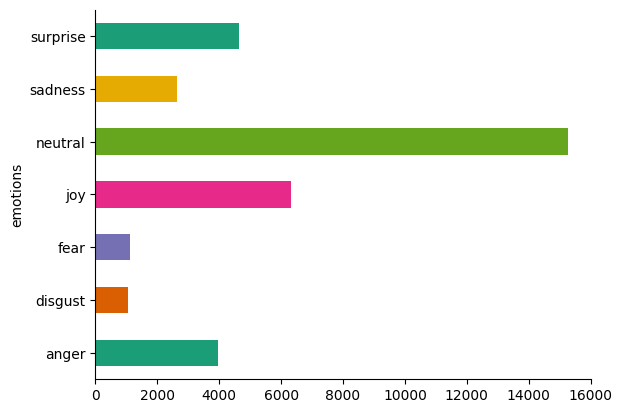

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('emotions').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df['emotions'].unique()

array(['neutral', 'surprise', 'fear', 'sadness', 'joy', 'disgust',
       'anger'], dtype=object)

In [ ]:
df['emotion_num']=df['emotions'].map({'neutral':0,'joy':1,'anger':2,'sadness':3,'contempt':4,'fear':5,'surprise':6,'disgust':7})

In [ ]:
df['triggers'].value_counts()

0.0    29416
1.0     5575
Name: triggers, dtype: int64

#### Balancing Dataset

In [ ]:
df0=df[df['triggers']==0].sample(5575)

In [ ]:
df1=df[df['triggers']==1].sample(5575)

In [ ]:
df1#df0

,emotions,utterances,triggers,emotion_num
24320,neutral,Okay Hes cute he is funny he is,1.0,0
26611,disgust,I mean I bring a guy home and within five minu...,1.0,7
903,neutral,Yeah because you all have such different looks...,1.0,0
7567,joy,Thats so Janine youyouyou know what do you kno...,1.0,1
25914,neutral,What do you mean,1.0,0
...,...,...,...,...
14122,surprise,You do,1.0,6
12549,joy,Kinda but Ive just been having way too much fun,1.0,1
21872,neutral,Oh yknow what,1.0,0
22750,anger,Oh yeah really Is it Ross Yeah Okay well let m...,1.0,2


In [ ]:
combined_df = pd.concat([df1, df0], ignore_index=True)

In [ ]:
combined_df

,emotions,utterances,triggers,emotion_num
0,neutral,Okay Hes cute he is funny he is,1.0,0
1,disgust,I mean I bring a guy home and within five minu...,1.0,7
2,neutral,Yeah because you all have such different looks...,1.0,0
3,joy,Thats so Janine youyouyou know what do you kno...,1.0,1
4,neutral,What do you mean,1.0,0
...,...,...,...,...
11145,neutral,To the bank,0.0,0
11146,neutral,No real honey really it is fine just ggo with ...,0.0,0
11147,anger,Shh,0.0,2
11148,surprise,Can you believe that,0.0,6


### Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
combined_df

,emotions,utterances,triggers,emotion_num
0,neutral,Okay Hes cute he is funny he is,1.0,0
1,disgust,I mean I bring a guy home and within five minu...,1.0,7
2,neutral,Yeah because you all have such different looks...,1.0,0
3,joy,Thats so Janine youyouyou know what do you kno...,1.0,1
4,neutral,What do you mean,1.0,0
...,...,...,...,...
11145,neutral,To the bank,0.0,0
11146,neutral,No real honey really it is fine just ggo with ...,0.0,0
11147,anger,Shh,0.0,2
11148,surprise,Can you believe that,0.0,6


In [ ]:
df=combined_df.dropna()

In [ ]:
df

,emotions,utterances,triggers,emotion_num
0,neutral,Okay Hes cute he is funny he is,1.0,0
1,disgust,I mean I bring a guy home and within five minu...,1.0,7
2,neutral,Yeah because you all have such different looks...,1.0,0
3,joy,Thats so Janine youyouyou know what do you kno...,1.0,1
4,neutral,What do you mean,1.0,0
...,...,...,...,...
11145,neutral,To the bank,0.0,0
11146,neutral,No real honey really it is fine just ggo with ...,0.0,0
11147,anger,Shh,0.0,2
11148,surprise,Can you believe that,0.0,6


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
X = df[['utterances',
        'emotion_num']]
y = df['triggers']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
vectorizer1 = TfidfVectorizer()
column_transformer = ColumnTransformer(
    [('tfidf1', vectorizer1, 'utterances')],
    remainder='passthrough')
pipe = Pipeline([
                  ('tfidf', column_transformer),
                  ('classify', model)
                ])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.5780269058295964
Classification Report:
              precision    recall  f1-score   support

         0.0       0.57      0.57      0.57      1100
         1.0       0.58      0.59      0.59      1130

    accuracy                           0.58      2230
   macro avg       0.58      0.58      0.58      2230
weighted avg       0.58      0.58      0.58      2230



In [ ]:
y_test.sum()

1130.0

In [ ]:
y_pred.sum()

1145.0

In [ ]:
import pickle
with open('modelv0.pkl', 'wb') as file:
    pickle.dump(pipe, file)


In [ ]:
import pickle

with open('modelv0.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
df_test=pd.read_csv('/content/drive/MyDrive/EDiReF-SemEval/Dataincsv/task3test.csv')

In [ ]:
df_test

,Unnamed: 0,speakers,emotions,utterances
0,0,Mark,surprise,Why do all youre coffee mugs have numbers on ...
1,1,Rachel,anger,Oh. Thats so Monica can keep track. That way ...
2,2,Rachel,neutral,Y'know what?
3,3,Joey,neutral,"Come on, Lydia, you can do it."
4,4,Joey,joy,Push!
...,...,...,...,...
8637,8637,Monica,anger,"Yeah, fade the accent out and people will thin..."
8638,8638,Rachel,neutral,"Yeah, I mean, come on Ross, no one will even n..."
8639,8639,Ross,surprise,They’re not listening too me?
8640,8640,Rachel,neutral,Of course they’re listening to you! Everybody ...


In [ ]:
df_test['emotion_num']=df_test['emotions'].map({'neutral':0,'joy':1,'anger':2,'sadness':3,'contempt':4,'fear':5,'surprise':6,'disgust':7})

In [ ]:
df_test

,Unnamed: 0,speakers,emotions,utterances,emotion_num
0,0,Mark,surprise,Why do all youre coffee mugs have numbers on ...,6
1,1,Rachel,anger,Oh. Thats so Monica can keep track. That way ...,2
2,2,Rachel,neutral,Y'know what?,0
3,3,Joey,neutral,"Come on, Lydia, you can do it.",0
4,4,Joey,joy,Push!,1
...,...,...,...,...,...
8637,8637,Monica,anger,"Yeah, fade the accent out and people will thin...",2
8638,8638,Rachel,neutral,"Yeah, I mean, come on Ross, no one will even n...",0
8639,8639,Ross,surprise,They’re not listening too me?,6
8640,8640,Rachel,neutral,Of course they’re listening to you! Everybody ...,0


In [ ]:
X_test = df_test[['utterances', 'emotion_num']]

In [ ]:
X_test=df_test['utterances','emotion_num']

KeyError: ('utterances', 'emotion_num')

In [ ]:
loaded_model.predict(X_test)

In [ ]:
//

### Using Val data

In [ ]:
df_val=pd.read_csv('/content/drive/MyDrive/EDiReF-SemEval/Dataincsv/task3val.csv')

In [ ]:
df_val

,Unnamed: 0,speakers,emotions,utterances,triggers
0,0,Ross,neutral,"Or! Or, we could go to the bank, close our acc...",0.0
1,1,Chandler,joy,Youre a genius!,0.0
2,2,Joey,sadness,"Aww, man, now we wont be bank buddies!",1.0
3,3,Chandler,neutral,"Now, theres two reasons.",0.0
4,4,Ross,neutral,"Or! Or, we could go to the bank, close our acc...",0.0
...,...,...,...,...,...
3517,3517,Monica,neutral,"This isnt something that we just, we just imp...",0.0
3518,3518,Monica,neutral,And it,0.0
3519,3519,Rachel,surprise,It is? Really?,0.0
3520,3520,Monica,neutral,"Yeah, sweetie.",0.0


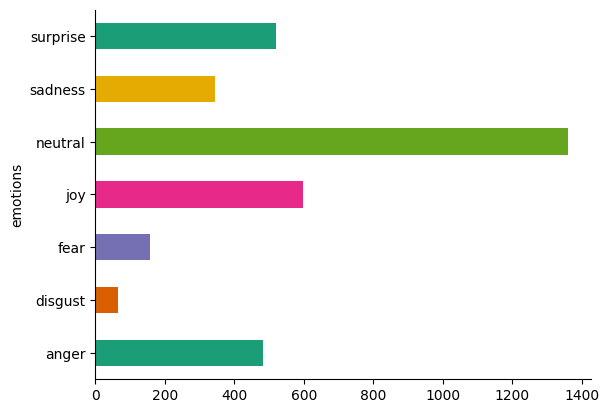

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df_val.groupby('emotions').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_val['emotion_num']=df_val['emotions'].map({'neutral':0,'joy':1,'anger':2,'sadness':3,'contempt':4,'fear':5,'surprise':6,'disgust':7})

In [ ]:
df_val=df_val.dropna()

In [ ]:
df_val

,Unnamed: 0,speakers,emotions,utterances,triggers,emotion_num
0,0,Ross,neutral,"Or! Or, we could go to the bank, close our acc...",0.0,0
1,1,Chandler,joy,Youre a genius!,0.0,1
2,2,Joey,sadness,"Aww, man, now we wont be bank buddies!",1.0,3
3,3,Chandler,neutral,"Now, theres two reasons.",0.0,0
4,4,Ross,neutral,"Or! Or, we could go to the bank, close our acc...",0.0,0
...,...,...,...,...,...,...
3517,3517,Monica,neutral,"This isnt something that we just, we just imp...",0.0,0
3518,3518,Monica,neutral,And it,0.0,0
3519,3519,Rachel,surprise,It is? Really?,0.0,6
3520,3520,Monica,neutral,"Yeah, sweetie.",0.0,0


In [ ]:
import re
df_val['utterances'] = df_val['utterances'].apply(lambda x: re.sub(r'[^\w ]+', "", x))

<ipython-input-45-9ce1fa5813db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['utterances'] = df_val['utterances'].apply(lambda x: re.sub(r'[^\w ]+', "", x))


In [ ]:
df_val

,Unnamed: 0,speakers,emotions,utterances,triggers,emotion_num
0,0,Ross,neutral,Or Or we could go to the bank close our accoun...,0.0,0
1,1,Chandler,joy,Youre a genius,0.0,1
2,2,Joey,sadness,Aww man now we wont be bank buddies,1.0,3
3,3,Chandler,neutral,Now theres two reasons,0.0,0
4,4,Ross,neutral,Or Or we could go to the bank close our accoun...,0.0,0
...,...,...,...,...,...,...
3517,3517,Monica,neutral,This isnt something that we just we just impul...,0.0,0
3518,3518,Monica,neutral,And it,0.0,0
3519,3519,Rachel,surprise,It is Really,0.0,6
3520,3520,Monica,neutral,Yeah sweetie,0.0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
X_train =df[['utterances',
        'emotion_num']]
y_train = df['triggers']
X_test = df_val[['utterances',
        'emotion_num']]
y_test = df_val['triggers']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
vectorizer1 = TfidfVectorizer()
column_transformer = ColumnTransformer(
    [('tfidf1', vectorizer1, 'utterances')],
    remainder='passthrough')
pipe = Pipeline([
                  ('tfidf', column_transformer),
                  ('classify', model)
                ])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.4532803180914513
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.42      0.57      3027
         1.0       0.16      0.67      0.26       494

    accuracy                           0.45      3521
   macro avg       0.52      0.54      0.41      3521
weighted avg       0.78      0.45      0.52      3521



In [ ]:
y_test.sum()

In [ ]:
y_pred.sum()

In [ ]:
df_test=pd.read_csv('/content/drive/MyDrive/EDiReF-SemEval/Dataincsv/task3test.csv')

In [ ]:
df_test

,Unnamed: 0,speakers,emotions,utterances
0,0,Mark,surprise,Why do all youre coffee mugs have numbers on ...
1,1,Rachel,anger,Oh. Thats so Monica can keep track. That way ...
2,2,Rachel,neutral,Y'know what?
3,3,Joey,neutral,"Come on, Lydia, you can do it."
4,4,Joey,joy,Push!
...,...,...,...,...
8637,8637,Monica,anger,"Yeah, fade the accent out and people will thin..."
8638,8638,Rachel,neutral,"Yeah, I mean, come on Ross, no one will even n..."
8639,8639,Ross,surprise,They’re not listening too me?
8640,8640,Rachel,neutral,Of course they’re listening to you! Everybody ...


In [ ]:
df_test['emotion_num']=df_test['emotions'].map({'neutral':0,'joy':1,'anger':2,'sadness':3,'contempt':4,'fear':5,'surprise':6,'disgust':7})

In [ ]:
X_test = df_test[['utterances','emotion_num']]

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
pipe

In [ ]:
y_pred.sum()

In [ ]:
y_pred

array([1., 1., 0., ..., 1., 0., 0.])

In [ ]:
import numpy as np

with open('answer.txt', 'w') as file:
    for value in y_pred:
        file.write(str(value) + '\n')